In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

%precision 3

np.random.seed(0)

### 練習問題4-1, 2, 3

In [31]:
# coin_data = np.array([0, 1])
count_num = 1000
coin_data = np.random.randint(0, 2, count_num)
# len(coin_data == 1), len(coin_data == 0)

coin_data_list = []
for idx in range(0, count_num):
    coin_data = np.array([0, 1])
    evidense = np.random.randint(0, 2)
    coin_data_list.append([evidense])
    # if idx>10:break
coin_data_list = np.array(coin_data_list)
# print(coin_data_list)
# print(len(np.where(coin_data_list[:, 0] == 1)[0]))
# print(np.where(coin_data_list[:, 0] == 1)[0])
print('表の確率：{0}'.format(len(np.where(coin_data_list[:, 0] == 1)[0]) / count_num * 100))
print('裏の確率：{0}'.format(len(np.where(coin_data_list[:, 0] == 0)[0]) / count_num * 100))

表の確率：51.9
裏の確率：48.1


In [10]:
?np.random.randint

Docstring:
randint(low, high=None, size=None, dtype='l')

Return random integers from `low` (inclusive) to `high` (exclusive).

Return random integers from the "discrete uniform" distribution of
the specified dtype in the "half-open" interval [`low`, `high`). If
`high` is None (the default), then results are from [0, `low`).

Parameters
----------
low : int
    Lowest (signed) integer to be drawn from the distribution (unless
    ``high=None``, in which case this parameter is one above the
    *highest* such integer).
high : int, optional
    If provided, one above the largest (signed) integer to be drawn
    from the distribution (see above for behavior if ``high=None``).
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.
dtype : dtype, optional
    Desired dtype of the result. All dtypes are determined by their
    name, i.e., 'in

### カーネル密度関数

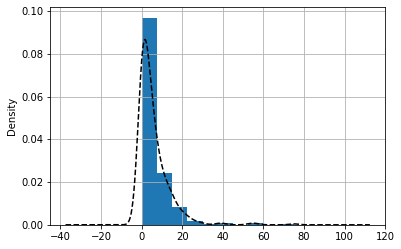

In [37]:
student_data_math = pd.read_csv('student-mat.csv', sep=';')
# student_data_math.head()

# カーネル密度関数
student_data_math.absences.plot(kind='kde', style='k--')

# 単純なヒストグラム、density-Trueにすることで確率で表示
student_data_math.absences.hist(density=True)
# student_data_math.absences.hist(density=False)
plt.grid(True)

### 練習問題4-4

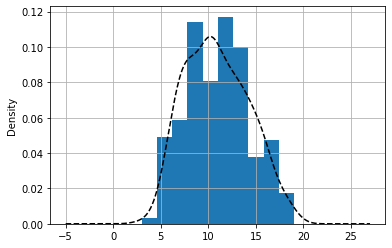

In [39]:
# カーネル密度関数
student_data_math.G1.plot(kind='kde', style='k--')

# 単純なヒストグラム、density-Trueにすることで確率で表示
student_data_math.G1.hist(density=True)
# student_data_math.absences.hist(density=False)
plt.grid(True)

In [3]:
import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

x, y = np.mgrid[10:100:2, 10:100:2]

pos = np.empty(x.shape + (2, ))

pos[:, :, 0] = x
pos[:, :, 1] = y

In [9]:
# 多次元正規分布
# それぞれの変数の平均と分散共分散行列を設定
# 以下の例では、xとyの平均がそれぞれ50と50、[[100, 0], [0, 100]]がxとyの共分散行列
xy_average = 50
x_rev = 100
y_rev = 100
rv = multivariate_normal([xy_average, xy_average], [[x_rev, 0], [0, y_rev]])

z = rv.pdf(pos)

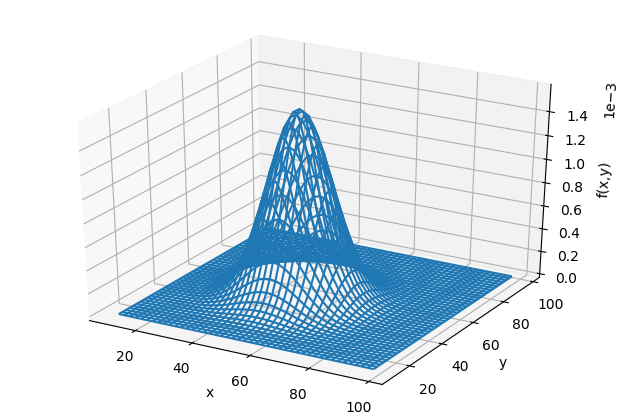

In [8]:
fig = plt.figure(dpi=100)

ax = Axes3D(fig)
ax.plot_wireframe(x, y, z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

ax.ticklabel_format(style='sci', axis='z', scilimits=(0, 0))

### 4-5 推定統計学

### 大数の法則

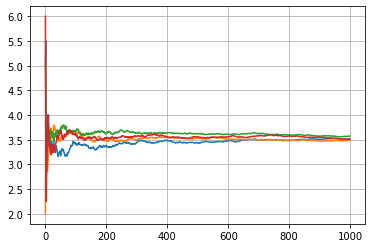

In [11]:
calc_times = 1000

sample_array = np.array(list(range(1, 7)))
number_cnt = np.arange(1, calc_times + 1)

for i in range(4):
    p = np.random.choice(sample_array, calc_times).cumsum()
    plt.plot(p / number_cnt)
    plt.grid(True)

### 中心極限定理

In [14]:
# 中心極限定理
def function_central_theory(N):
    
    sample_array = np.array(list(range(1, 7)))
    number_cnt = np.arange(1, N + 1) * 1.0
    
    mean_array = np.array([])
    
    for i in range(1000):
        cun_variables = np.random.choice(sample_array, N).cumsum() * 1.0
        mean_array = np.append(mean_array, cun_variables[N - 1] / N)
        
    plt.hist(mean_array)
    plt.grid(True)

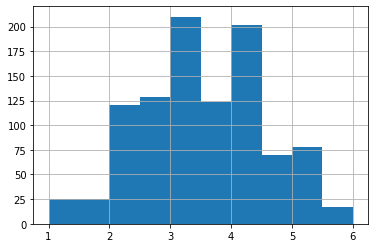

In [15]:
function_central_theory(3)

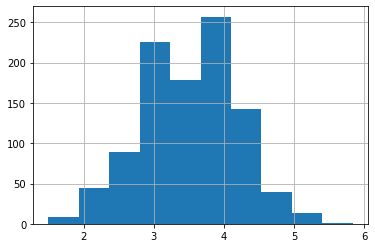

In [16]:
function_central_theory(6)

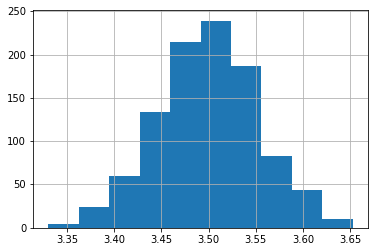

In [17]:
function_central_theory(10**3)

### 標本分布

### カイ二乗分布

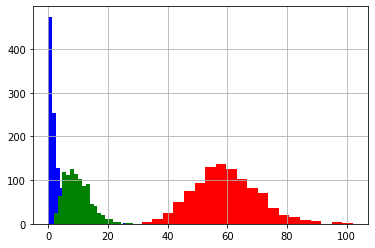

In [18]:
# カイ二乗分布
# 自由度2, 10, 60に従うカイ二乗分布が生成する乱数のヒストグラム
for df, c in zip([2, 10, 60], 'bgr'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, 20, color=c)
    plt.grid(True)

### スチューデントt分布

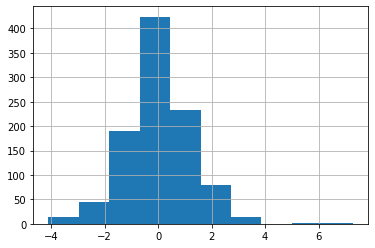

In [20]:
x = np.random.standard_t(5, 1000)
plt.hist(x)
plt.grid(True)

### F分布

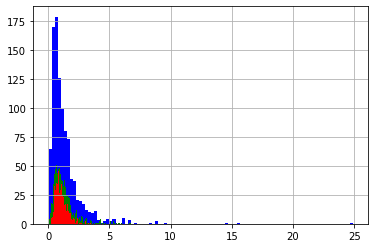

In [21]:
# F分布
for df, c in zip([(6, 7), (10, 10), (20, 25)], 'bgr'):
    x = np.random.f(df[0], df[1], 1000)
    
    plt.hist(x, 100, color=c)
    plt.grid(True)

### 統計的検定

In [24]:
student_data_math = pd.read_csv('student-mat.csv', sep=';')

student_data_por = pd.read_csv('student-por.csv', sep=';')

student_data_merge = pd.merge(
    student_data_math,
    student_data_por,
    on=[
        'school',
        'sex',
        'age',
        'address',
        'famsize',
        'Pstatus',
        'Medu',
        'Fedu',
        'Mjob',
        'Fjob',
        'reason',
        'nursery',
        'internet'],
    suffixes=('_math', '_por')
)
print(student_data_merge.G1_math.mean())
print(student_data_merge.G1_por.mean())

10.861256544502618
12.112565445026178


### 検定

In [27]:
from scipy import stats

t, p = stats.ttest_rel(student_data_merge.G1_math, student_data_merge.G1_por)
print(t)
print('p値 = ', p)

-8.632744457286481
p値 =  1.653655521710079e-16


### 第一種の過誤と第二種の過誤

In [28]:
# ?stats.ttest_rel